## Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

---

## Задача

### Подготовка данных к анализу
Загрузите данные о заведениях общественного питания Москвы. Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработайте их.
Путь к файлу: /datasets/rest_data.csv

### Анализ данных
1. Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
2. Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
3. Для какого вида объекта общественного питания характерно сетевое распространение?
4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
6. Выделите в отдельный столбец информацию об улице из столбца address .
7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
9. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
10. __Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.__

### Подготовка презентации
Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf.

---
## Описание данных
__Таблица rest_data__
* __object_name__ — название объекта общественного питания;
* __chain__ — сетевой ресторан;
* __object_type__ — тип объекта общественного питания;
* __address__ — адрес;
* __number__ — количество посадочных мест.

### Разделы
* [Открытие данных](#start)
* [Предобработка данных](#preprocessing)
* [Анализ данных](#dataanalysis)

---
### Ответы на вопросы
1. [Исследуйте соотношение видов объектов общественного питания по количеству](#question1)
2. [Исследуйте соотношение сетевых и несетевых заведений по количеству](#question2)
3. [Для какого вида объекта общественного питания характерно сетевое распространение?](#question3)
4. [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#question4)
5. [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?](#question5)
6. [Выделите в отдельный столбец информацию об улице из столбца address](#question6)
7. [Постройте график топ-10 улиц по количеству объектов общественного питания. Добавьте районы](#question7)
     * [Парсер](#method1)
     * [Библиотека geopy](#method2)
     * [API Яндекс Карт](#method3)
8. [Найдите число улиц с одним объектом общественного питания](#question8)
9. [Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить](#question9)
10. [Сделайте общий вывод и дайте рекомендации](#question10)
     * [Презентация](#presentation)

<a id="start"></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
import warnings
from tqdm import tqdm
#!pip install squarify
#import squarify
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(14,8)})

In [19]:
path = '/datasets/'
df = pd.read_csv(path+'rest_data.csv')

<a id="preprocessing"></a>

## Шаг №1. Подготовка данных

In [20]:
def firstlook(df):
    '''
    Основные характеристики датафрейма (размер, пропущенные значения, дубликаты, статистики)
    '''
    print()
    print('=================')
    print(f'Размер датафрейма \n{df.shape}')
    print()
    print('=================')
    print(f'Info \n{df.info()}')
    print()
    print('=================')
    print(f'Доля пропущенных значений \n{df.isna().sum()/df.shape[0]}')
    print()
    print('=================')
    print(f'Количество дубликатов \n{df.duplicated().sum()}')
    print()
    print('=================')
    print(f'Описание данных \n{df.describe()}')
    return df.head()

In [21]:
firstlook(df)


Размер датафрейма 
(15366, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
Info 
None

Доля пропущенных значений 
id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64

Количество дубликатов 
0

Описание данных 
                  id        number
count   15366.000000  15366.000000
mean   119720.066901     59.547182
std     73036.130732     74.736833
min       838.000000      0.000000
25%     28524.000000     12.000000
50%    144974.500000     40.000000
75%    184262.250000     80.000000
max    223439.000000   1700.000000


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


### На первый взгляд все ок, нет пропущенных значения, дубликатов, типы данных корректные. Посмотрим  уникальные значения выборочно в столбцах.

In [22]:
[df[col].unique() for col in ['object_type','chain','number']]

[array(['кафе', 'столовая', 'закусочная',
        'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
        'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object),
 array(['нет', 'да'], dtype=object),
 array([  48,   35,   95,   40,   50,  240,   10,   90,  150,  120,    5,
          24,  140,   32,  270,  320,    7,    2,  160,   20,   30,  110,
           6,  192,   65,   45,    4,  125,  100,   49,   63,   70,   22,
          56,   38,  220,   78,    3,   80,   46,   15,   96,   60,   47,
         180,  250,  200,   25,   12,   14,   16,  420,   98,   75,   34,
         216,   43,   54,  580,  159,    0,   28,   64,   67,   42,  124,
          82,   36,  114,    8,   71,   18,  158,   55,  196,   44,   76,
         144,   41,   26,   68,  143,  198,   79,    1,   86,  148,  190,
         202,  131,   52,   92,  300,   85,  102,   88,   84,  246,   81,
          94,   23,   37,   39,   99,   61,   11,  130,   74,  128,  106,
          58,  260,   27,   19,   29,   13

### Значения в колонке object_name
1. Если почистить форматирование в названиях заведений, можно сократить количество дублей в дальнейших подсчетах
2. Так же в данных присутствуют режимные заведения, не будем брать заводы и предприятия, тк мы не знаем вынесена ли у них столовая из здания.  Но, очевидно, что в школьном общепите нельзя покушать любому человеку. По законам РФ у школ пропускной режим. Скорее всего, такие места не будут являться конкурентами для открытия нашего кафе и их можно удалить.

### Почистим форматирование названий заведений (приведем в единый формат) и удалим дубли
* Проверим уменьшится ли количество уникальных объектов, это должно помочь далее при анализе данных
* Удалим дубли по сабсету 'адрес + название заведения'

In [23]:
def get_unique_object(df):
    count_unique = df.object_name.nunique()
    count_shape0 = df.shape[0]
    replace_list = ['«','»','"',',','(',')']
    for i in replace_list:
        df['object_name'] = df['object_name'].str.replace(i,' ').str.lower()
    df['object_name'] = df['object_name'].str.replace('  ',' ')
    df.drop_duplicates(subset=['object_name','address'], keep='first', inplace=True)
    print(f'Количество уникальных заведений уменьшилось на {count_unique - df.object_name.nunique()}')
    print(f'Количество дублей удалено {count_shape0 - df.shape[0]}')
    return df

In [24]:
df = get_unique_object(df)

Количество уникальных заведений уменьшилось на 486
Количество дублей удалено 225


In [25]:
df.shape[0]

15141

### Для компактности визуализации сократим некоторые названия

In [26]:
df['chain'] = df['chain'].map({'нет':'отдельное заведение','да':'сетевое заведение'})
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания','фастфуд')
df['object_type'] = (df['object_type'].str.replace('магазин',''))

## Шаг №2. Анализ данных

### Для визуализации 1,2,3 вопросов напишем функцию

In [27]:
def viz_first(df, number_question=3):
    '''
    Визуализация данных для 1,2,3 вопросов. Переделать стиль графиков, привести к единому цвету sns график
    '''
    temp = df.groupby(['object_type','chain'], as_index=False).agg({'number':'count'})
    
    if number_question == 3:
        temp['total'] = temp['number'].groupby(temp['object_type']).transform('sum')
        temp['share'] = round((temp['number']/temp['total'])*100,2)
        plt.figure(figsize=(16, 6))
        ax = sns.barplot(x='object_type', y='number', data=temp, hue = 'chain', orient='v' )
        ax.set(title = 'Визулизация по количеству заведений каждого типа, разделение на сетевые и не сетевые', xlabel='тип заведения', ylabel='количество')
        plt.xticks(rotation=60)
        plt.show()
        return temp
    
    elif number_question == 2:
        temp = temp.groupby('chain', as_index=False).agg({'number':'sum'})
    
    else:
        temp = temp.groupby('object_type', as_index=False).agg({'number':'sum'})

    temp['share'] = round((temp[temp.columns[1]]/temp[temp.columns[1]].sum())*100,2)
    temp.sort_values('share', ascending=False, inplace=True)
    #fig = px.bar(temp, x=temp.columns[0], y=temp.columns[1], title=f'Количество объектов каждого типа для {temp.columns[0]}', 
    #         labels={temp.columns[0]:'тип заведения',temp.columns[1]:'количество'}, orientation='v', width=1000,
    #height=500)
    #fig.update_xaxes(tickangle=45)
    #fig.show()
    ax = temp.plot(x=temp.columns[0], y=temp.columns[1], kind='bar', 
                   figsize=(16,6),rot=60, label='количество заведений каждого типа')
    plt.title(f'Количество объектов каждого типа для {temp.columns[0]}')
    plt.ylabel('Количество')
    plt.xlabel('Тип заведения')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2,
        p.get_height(),
        '{:.2f}'.format(float(p.get_height())),
        fontsize=10,
        color='black',
        ha='center',
        va='bottom')
    plt.show()
    return temp

<a id="question1"></a>
### 1. Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

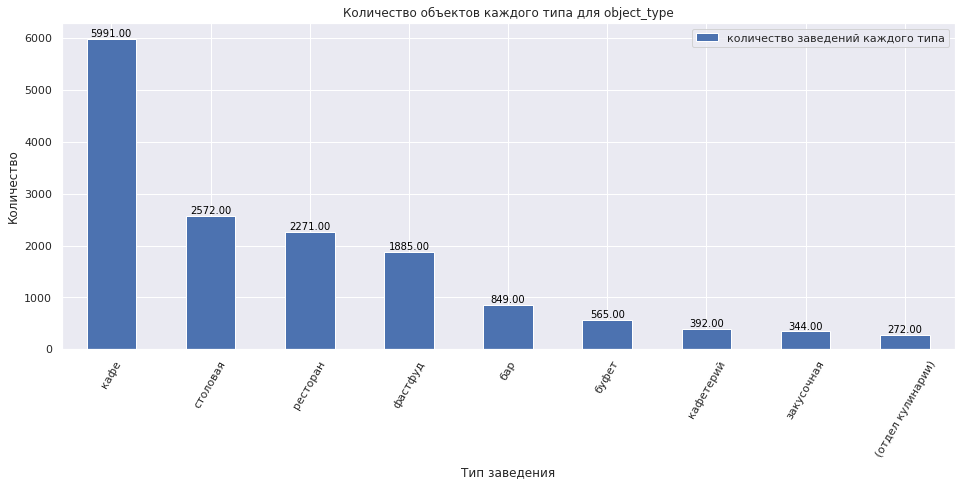

,object_type,number,share
4,кафе,5991,39.57
7,столовая,2572,16.99
6,ресторан,2271,15.00
8,фастфуд,1885,12.45
1,бар,849,5.61
2,буфет,565,3.73
5,кафетерий,392,2.59
3,закусочная,344,2.27
0,(отдел кулинарии),272,1.80


In [28]:
viz_first(df,1)

# Вывод
* __Наибольшее количество объектов__ у заведений типа кафе (5591 заведений) и столовая (2572 заведения);
* __Наименьшее количество объектов__ у заведений типа "отдел кулинарии в магазине" (272 заведения) и заскусочных (344 заведения).

<a id="question2"></a>
### 2. Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

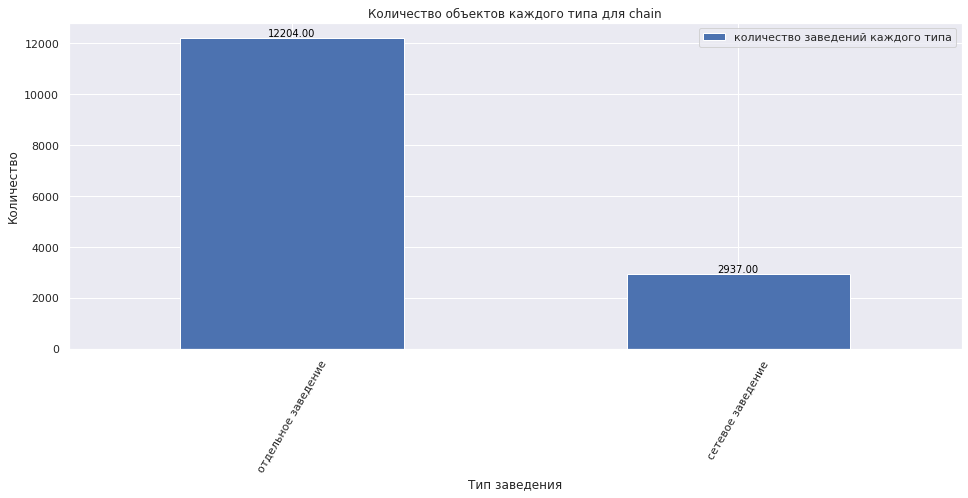

,chain,number,share
0,отдельное заведение,12204,80.6
1,сетевое заведение,2937,19.4


In [29]:
viz_first(df,2)

# Вывод
* По нашим данным наибольшее количество заведений не относится к сетевым. Соотношение отдельных заведений и сетевых заведений в пропорции: 80/20

<a id="question3"></a>
### 3. Для какого вида объекта общественного питания характерно сетевое распространение?

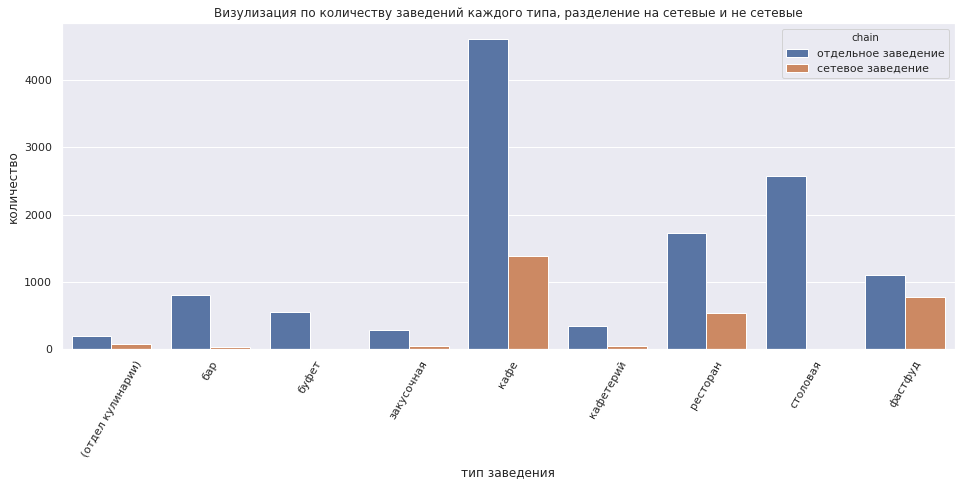

,object_type,chain,number,total,share
0,(отдел кулинарии),отдельное заведение,194,272,71.32
1,(отдел кулинарии),сетевое заведение,78,272,28.68
2,бар,отдельное заведение,812,849,95.64
3,бар,сетевое заведение,37,849,4.36
4,буфет,отдельное заведение,556,565,98.41
5,буфет,сетевое заведение,9,565,1.59
6,закусочная,отдельное заведение,288,344,83.72
7,закусочная,сетевое заведение,56,344,16.28
8,кафе,отдельное заведение,4609,5991,76.93
9,кафе,сетевое заведение,1382,5991,23.07


In [30]:
viz_first(df,3)

# Вывод
* Сетевое распространение __характерно:__ для фастфуда (41,49% от всех заведений этого типа), отдела кулинарии (28,6%), кафе (23% от всех заведений этого типа) и ресторана (23,7%);
* Сетевое распространение __не характерно:__ для столовой (0,12% от всех столовых), буфета (1,59%) и бара (4,36% от всех баров)

<a id="question4"></a>
### 4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
* __Для того, чтобы ответить на этот вопрос, найдем 95 квантиль распределения посадочных мест__. 
* 95% наблюдений сетевых и несетевых заведений будут находится ниже этого значения количества посадочных мест. 
* Отметим 95 квантили для сетевых и отдельных заведений на графике отображающим количество мест.

In [31]:
pd.DataFrame({'type_chain':['сетевое заведение','отдельное заведение'], 
              'quantile_95':[df[df['chain']=='сетевое заведение'].quantile(0.95)[1],df[df['chain']=='отдельное заведение'].quantile(0.95)[1]]})

,type_chain,quantile_95
0,сетевое заведение,159.2
1,отдельное заведение,236.0


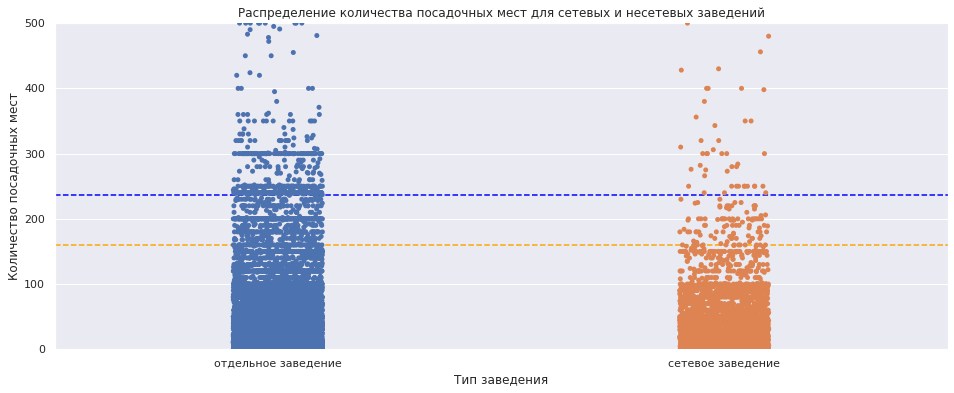

In [32]:
plt.figure(figsize=(16, 6))
ax = sns.stripplot(x="chain", y="number", data=df)
ax.set(title = 'Распределение количества посадочных мест для сетевых и несетевых заведений', 
       ylabel = 'Количество посадочных мест', xlabel = 'Тип заведения', ylim=(0,500))
#отметим 95 квартили на графике для сетевых и несетевых заведений
plt.axhline(y=df[df['chain']=='сетевое заведение'].quantile(0.95)[1], color='orange', linestyle='--')
plt.axhline(y=df[df['chain']=='отдельное заведение'].quantile(0.95)[1], color='blue', linestyle='--')
plt.show()

In [33]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,отдельное заведение,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,отдельное заведение,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе академия,отдельное заведение,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,сетевое заведение,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе вишневая метель,отдельное заведение,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


# Вывод
* У сетевых заведений большинство объектов имеет меньше количество посадочных мест, чем у отдельных заведений. 

### 5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
<a id="question5"></a>

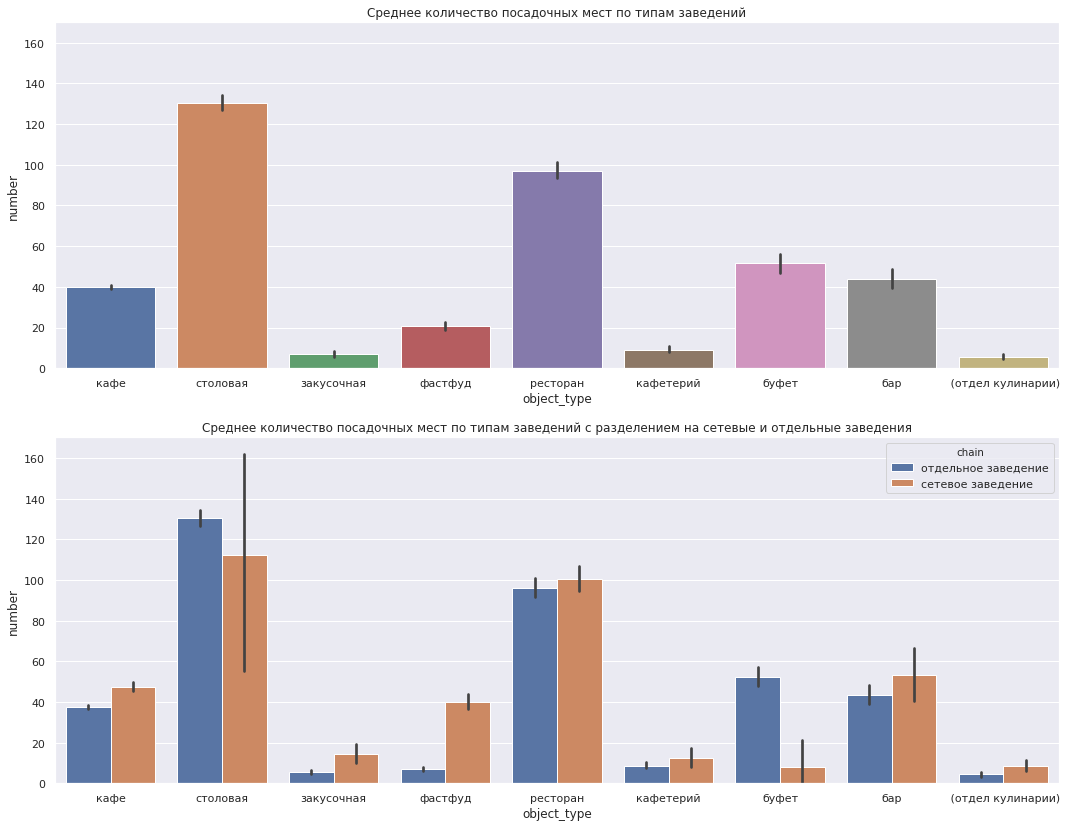

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18,14), sharey=True)

ax[0].set(title='Среднее количество посадочных мест по типам заведений', ylabel='Тип заведения', xlabel = 'Ср.кол-во мест')
sns.barplot(x='object_type', y='number', data=df, ax=ax[0])

ax[1].set(title='Среднее количество посадочных мест по типам заведений c разделением на сетевые и отдельные заведения', ylabel='Ср.кол-во мест', xlabel = 'Типы заведения с разделением на сетевое и отдельное')
sns.barplot(x='object_type', y='number', data=df, ax=ax[1], hue='chain')

plt.show()

# Вывод
* __Тут стоит выделить несколько фактов:__
    1. В сетевом фастфуде в среднем количество посадочных мест намного больше, чем в отдельных заведениях того же типа. 40,2 посадочных места в сетевом против 6,9 в отдельных заведениях
    2. Самое большое количество посадочных мест предоставляет столовая и это тип заведения не характерен для сетей (только 3 наблюдения и среднее здесь не показательно), для отдельных заведения среднее количество мест в столовой ~ 130.
    3. Подробная таблица ниже

In [35]:
df.groupby(['object_type','chain'], as_index=True).agg({'number':'mean'})

number
object_type        chain                          
 (отдел кулинарии) отдельное заведение    4.376289
                   сетевое заведение      8.679487
бар                отдельное заведение   43.233990
                   сетевое заведение     53.027027
буфет              отдельное заведение   52.370504
                   сетевое заведение      7.777778
закусочная         отдельное заведение    5.451389
                   сетевое заведение     14.375000
кафе               отдельное заведение   37.630939
                   сетевое заведение     47.535456
кафетерий          отдельное заведение    8.653959
                   сетевое заведение     12.509804
ресторан           отдельное заведение   96.035797
                   сетевое заведение    100.638219
столовая           отдельное заведение  130.478786
                   сетевое заведение    112.333333
фастфуд            отдельное заведение    6.942883
                   сетевое заведение     40.209719

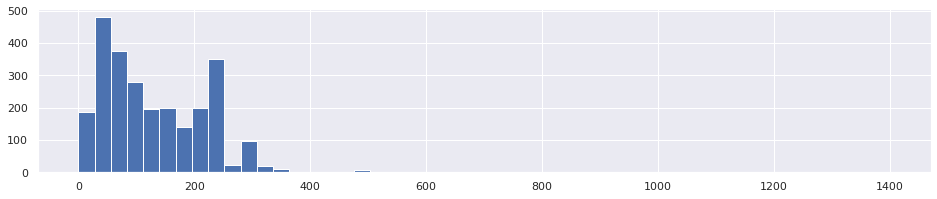

In [36]:
df.query('object_type == "столовая" & chain == "отдельное заведение"')['number'].hist(bins=50, figsize=(16,3))
plt.show()

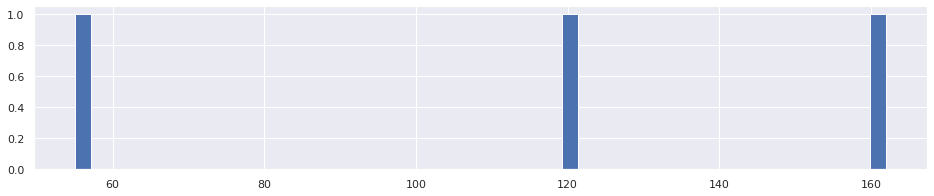

In [37]:
df.query('object_type == "столовая" & chain == "сетевое заведение"')['number'].hist(bins=50, figsize=(16,3))
plt.show()

<a id="question6"></a>
### 6. Выделите в отдельный столбец информацию об улице из столбца address
* Используем для этого регулярное выражение:
    * __(([А-я0-9\s\-]+)?(улица|переулок|шоссе|бульвар|площадь|набережная|проезд|проспект|аллея)([А-я0-9\s\-]+)?)__

In [38]:
def reg_extract(df, column_extract = 'address', new_column = 'street'):
    df[new_column] = (df[column_extract].str.extract(pat = 
                '\,(([А-я0-9\s\-]+)?(улица|переулок|шоссе|бульвар|площадь|набережная|проезд|проспект|аллея|километр|квартал|линия|проезд)([А-я0-9\s\-]+)?)\,')[0])
    shape_1 = df[df[new_column].isnull()==False].shape[0]
    shape_2 = df[df[new_column].isnull()].shape[0]
    print(f'Выделено уникальных улиц = {df[new_column].nunique()} в {shape_1} строк. ', 
      f'Кол-во строк в которых улицы не получилось выделить = {shape_2}')
    df[new_column] = df[new_column].str.strip()
    return df

In [39]:
df = reg_extract(df)

Выделено уникальных улиц = 1810 в 13883 строк.  Кол-во строк в которых улицы не получилось выделить = 1258


#### Посмотрим, что объединяет строки, в которых не получилось выделить улицу
* В большинстве необработанных адресов, в улице содержится буква ё. Заменим её на е и повторим обработку

In [40]:
df['address'] = df['address'].str.replace('ё','е')
df = reg_extract(df)

Выделено уникальных улиц = 1904 в 14711 строк.  Кол-во строк в которых улицы не получилось выделить = 430


In [42]:
df.tail()

,id,object_name,chain,object_type,address,number,street
15359,222077,кофейня шоколадница,сетевое заведение,кафе,"город Москва, Кантемировская улица, дом 47",72,Кантемировская улица
15360,219759,шоколадница,сетевое заведение,кафе,"город Москва, улица Вавилова, дом 3",36,улица Вавилова
15361,208537,шоколадница,сетевое заведение,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,сетевое заведение,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15364,221900,шоколадница,сетевое заведение,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


In [ ]:
# В оставшихся строках есть невыделенные улицы + адреса без улиц(по условию они нам не нужны)
#df[df.street.isnull()]

In [43]:
df = df[df['street'].isnull()==False]

In [44]:
df.shape[0]

14711

<a id="question7"></a>
### 7а. Постройте график топ-10 улиц по количеству объектов общественного питания. 

In [45]:
top_10_street = df.groupby('street', as_index=False).agg({'id':'nunique'})\
    .rename(columns={'id':'count'}).sort_values('count', ascending=False).head(10)
top_10_street_list = list(top_10_street.street.unique())

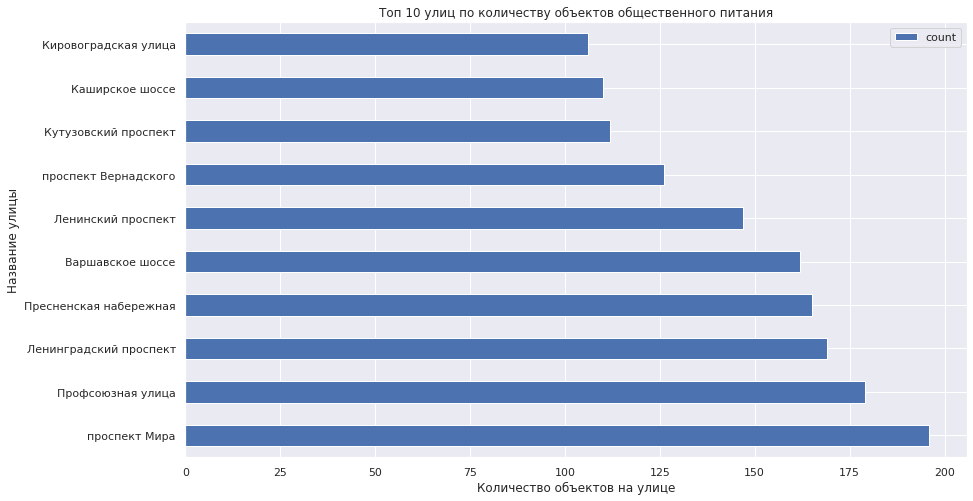

In [46]:
ax = top_10_street.set_index('street').plot(kind='barh')
ax.set_title('Топ 10 улиц по количеству объектов общественного питания')
ax.set_ylabel('Название улицы')
ax.set_xlabel('Количество объектов на улице')
plt.show()

### Добавим на график разделение на сетевые и отдельные заведения

In [47]:
top_10_street_hue_chain = df.groupby(['street','chain'], as_index=False).agg({'id':'nunique'})\
    .rename(columns={'id':'count'}).sort_values(['street','chain'])
top_10_street_hue_chain = top_10_street_hue_chain[top_10_street_hue_chain['street'].isin(top_10_street_list)]
#top_10_street_hue_chain.set_index('street', inplace=True)

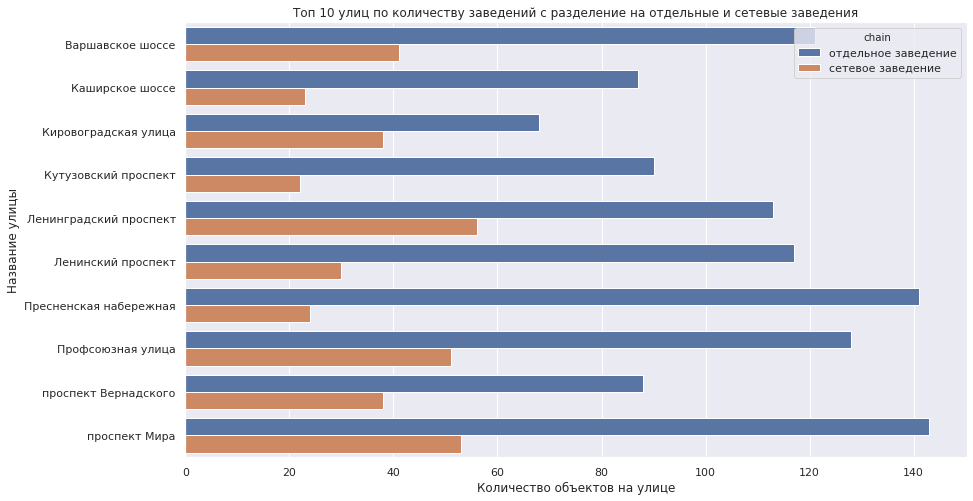

In [49]:
ax = sns.barplot(x='count', y='street', data=top_10_street_hue_chain,  hue='chain', orient="h")
ax.set_title('Топ 10 улиц по количеству заведений с разделение на отдельные и сетевые заведения')
ax.set_ylabel('Название улицы')
ax.set_xlabel('Количество объектов на улице')
plt.show()

 * Скорее всего количество заведений на улице может характеризоваться несколькими факторами, но основной фактор - длина улицы. К сожалению, не нашел как получить информацию о длине улицы, но было бы интересно посмотреть на корреляцию между кол-во заведений и длиной улицы по всему датафрейму.

### 7b. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

<a id="method1"></a>
### Напишем парсер для сбора районов и округов 
* Сайт донор: http://www.округа-районы.москва/все_улицы_москвы
* Время обработки ~2 минуты

In [50]:
def parsing_district_table(page_number):
    '''
    Парсим административные округа, районы, индексы и принадлежность к ним улиц
    '''
    page = 'http://www.округа-районы.москва/все_улицы_москвы?page=' + str(page_number)
    webpage = requests.get(page)
    soup = BeautifulSoup(webpage.content, "html.parser")
    table = soup.find("table", attrs={"class": "table table-striped table-bordered"})
    heading_table = []
    content=[]
    for row in table.find_all('th'):
        heading_table.append(row.text)
    for row in table.find_all('tr'):
        if not row.find_all('th'):
            content.append([element.text for element in row.find_all('td')])
    content = content[1:]
    return pd.DataFrame(content, columns = heading_table)

In [51]:
#запустим постраничный сбор в цикле
page_list = list(range(2,310))
district_df = parsing_district_table(1)
for i in page_list:
    district_df = pd.concat([district_df, parsing_district_table(i)])

In [52]:
district_df.shape[0]

6179

In [53]:
district_df.head(10)

,Наименование,Тип,Индекс,Административный округ,Район
0,1,мкр,142793,Новомосковский административный округ,Десёновское поселение
1,1 Маевки,аллея,111395,Восточный административный округ,район Вешняки
2,1 Мая,ул,124365,Зеленоградский административный округ,район Крюково
3,1-й,мкр,142784,Новомосковский административный округ,Внуковское поселение
4,1-й,пр-кт,111396,Восточный административный округ,район Ивановское
5,1-й Автозаводский,проезд,115280,Южный административный округ,Даниловский район
6,1-й Автопарк,ул,142150,Троицкий административный округ,Краснопахорское поселение
7,1-й Амбулаторный,проезд,125315,Северный административный округ,район Аэропорт
8,1-й Архивный,пер,119048,Центральный административный округ,район Хамовники
9,1-й Бабьегородский,пер,119049,Центральный административный округ,район Якиманка


#### Хоть у нас задача всего на 10 улиц, их все равно надо переводить в необходимый вид, чтобы сджойнить. Рассмотрим другие способы


### Исследуем другие способы - Яндекс Карты по API и библиотеку geopу

<a id="method2"></a>
### Библиотека geopy
* Достаточно капризна к разным форматам адресов
* Необходимо поставить дополнительный модуль
    * pip install geopy
    * from geopy.geocoders import Nominatim

In [54]:
def get_street_info_second_attempt(map_street_name_string, lib='geoloc'):
    '''
    Использует библиотеку geopy, возвращает точки/районы по адресу.
    Капризна к формату адресов
    '''
    geolocator = Nominatim()
    location = geolocator.geocode(map_street_name_string, timeout=None)
    return location

<a id="method3"></a>
### Получим бесплатный API ключ и напишем функцию для работы с API Яндекс Карт
* Всеядны, понимают почти любой формат адреса
* Ограничение на количество бесплатных запросов 25000/сутки
* Возвращает улицу из адреса (аргумент what_we_need = 'street_info'). Скорость 4 итерации/сек
* Возвращает район по адресу (аргумент what_we_need = 'любая другая произвольная строка'). Скорость 1,5 итерации/сек
* Обработка полного датафрейма из 6000 строк, занимает ~25 минут, получение районов занимает ~65 минут
* __Обработка выборок для задания занимает суммарно ~5 минут__
* Лучше выполнять с __progress_apply__ чтобы отслеживать выполнение, импортировать:
    * from tqdm import tqdm
    * tqdm.pandas()

In [55]:
def yandex_map_api(map_street_name_string, what_we_need='street_info'):
    key = 'твой_апи_ключ_тут'
    first_part_url = 'https://geocode-maps.yandex.ru/1.x/?apikey='
    r = requests.get(first_part_url+key+'&kind=district&sco=latlong&geocode='+map_street_name_string+'&format=json').json()
    #улица получаем улицу для полного адреса, принимает строку: город + адрес + дом
    #ловим ошибки на этапе получения улицы и района
    try:
        street = json_normalize(r['response']['GeoObjectCollection']['featureMember'])['GeoObject.name'][0]    
        district = r['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['metaDataProperty']['GeocoderMetaData']['Address']['Components'][1]['name']
    except Exception:
        street = 'error'
        district = 'error'
    if what_we_need == 'street_info':
        return street
    #ловим ошибки когда парсим гео точки
    try:
        position = json_normalize(r['response']['GeoObjectCollection']['featureMember'])['GeoObject.Point.pos'][0]
    except Exception:
        position = '1 2' #обработка ошибок, передаем значение, чтобы не переписывать остальной код
    longitude =  position.split()[1]
    altitude = position.split()[0]
    gps_list = [float(longitude),float(altitude)]
    #ловим ошибки, когда получаем районы
    try:
        r2 = requests.get(first_part_url+key+'&kind=district&sco=latlong&geocode='+str(gps_list[0])+','+str(gps_list[1])+'&format=json').json()
        area = r2['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['metaDataProperty']['GeocoderMetaData']['Address']['Components'][4]['name']
    except Exception:
        area = 'error'
    return area

In [56]:
# добавим город, для полного адреса
top_10_street['full_street'] = 'город Москва, '+top_10_street['street']

In [57]:
top_10_street

,street,count,full_street
1426,проспект Мира,196,"город Москва, проспект Мира"
1026,Профсоюзная улица,179,"город Москва, Профсоюзная улица"
702,Ленинградский проспект,169,"город Москва, Ленинградский проспект"
1011,Пресненская набережная,165,"город Москва, Пресненская набережная"
417,Варшавское шоссе,162,"город Москва, Варшавское шоссе"
705,Ленинский проспект,147,"город Москва, Ленинский проспект"
1422,проспект Вернадского,126,"город Москва, проспект Вернадского"
692,Кутузовский проспект,112,"город Москва, Кутузовский проспект"
616,Каширское шоссе,110,"город Москва, Каширское шоссе"
623,Кировоградская улица,106,"город Москва, Кировоградская улица"


In [58]:
tqdm.pandas()
#Возвращает район по адресу
top_10_street['area'] = top_10_street['full_street'].progress_apply(lambda x: yandex_map_api(str(x),'area'))

100%|██████████| 10/10 [00:03<00:00,  2.52it/s]


In [59]:
#дропнем ненужный столбец
top_10_street.drop(['full_street'], axis=1, inplace=True)

In [60]:
top_10_street

,street,count,area
1426,проспект Мира,196,Северо-Восточный административный округ
1026,Профсоюзная улица,179,Юго-Западный административный округ
702,Ленинградский проспект,169,Северный административный округ
1011,Пресненская набережная,165,Центральный административный округ
417,Варшавское шоссе,162,Южный административный округ
705,Ленинский проспект,147,Юго-Западный административный округ
1422,проспект Вернадского,126,Юго-Западный административный округ
692,Кутузовский проспект,112,Западный административный округ
616,Каширское шоссе,110,Южный административный округ
623,Кировоградская улица,106,Южный административный округ


<a id="question8"></a>
### 8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
* Время обработки ~3 минуты

In [61]:
worst_street = df.groupby('street',as_index=False).agg({'id':'nunique'}).rename(columns={'id':'count'})
worst_street = worst_street[worst_street['count']==1]

In [62]:
print(f'Количество улиц с одним заведением: {worst_street.shape[0]}')

Количество улиц с одним заведением: 555


In [63]:
#добавим город
worst_street['full_street'] = 'город Москва, '+worst_street['street']

#Получим район по апи
worst_street['area'] = worst_street['full_street'].progress_apply(lambda x: yandex_map_api(str(x),'area'))

100%|██████████| 555/555 [04:05<00:00,  2.15it/s]


In [64]:
#удалим ненужный столбец
worst_street.drop(['full_street'],axis=1,inplace=True)
worst_street_list = list(worst_street.street.unique())

In [65]:
#проверим на ошибки
worst_street[worst_street['area']=='error']

,street,count,area
14,1-й Заречный переулок,1,error
121,2-я Барышевская улица,1,error
188,39-й километр Калужского шоссе,1,error
272,Армейская улица,1,error
1268,Физическая улица,1,error
1298,Цветочная улица,1,error
1427,улица 1-й километр Объездной Дороги,1,error
1797,улица Рассудовское Лесничество,1,error


* Из 555 строк получили 8 ошибок, все перечисленные улицы находятся в "Новой Москве", географически Москва, но карты считают, что нет. 

In [66]:
#дропнем их
worst_street = worst_street[worst_street['area']!='error']

In [67]:
worst_street.shape

(547, 3)

In [68]:
worst_street.groupby('area')['count'].count().sort_values(ascending=False).head(1).to_frame()

,count
area,
Центральный административный округ,175


* __Больше всего улиц с одним заведением находится в ЦАО, похоже что во всем виноваты длина улицы и отсутствие огромных ТЦ__

<a id="question9"></a>
### 9. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

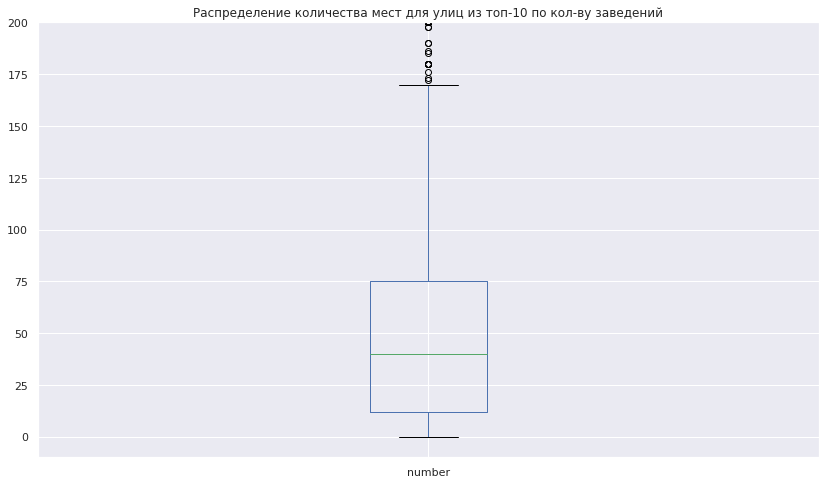

In [69]:
temp_df_top_10_street = df[df['street'].isin(top_10_street_list)]
ax = temp_df_top_10_street.boxplot('number')
ax.set_ylim(-10,200)
ax.set_title('Распределение количества мест для улиц из топ-10 по кол-ву заведений')
plt.show()

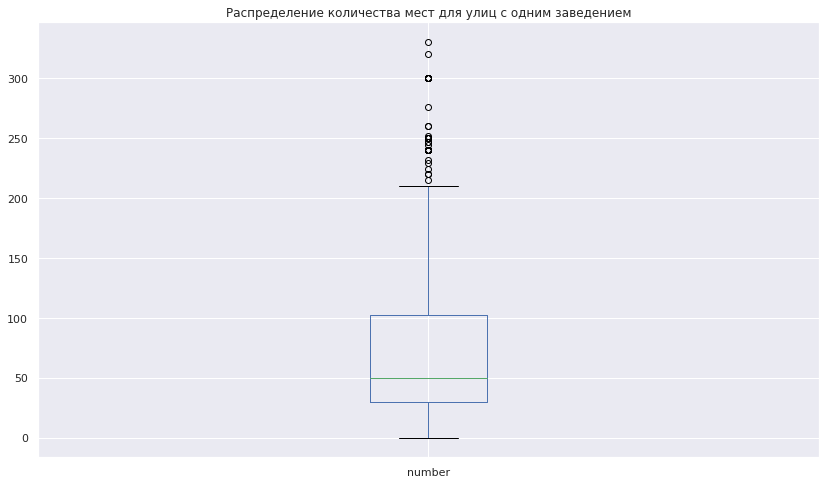

In [70]:
temp_worst_street = df[df['street'].isin(worst_street_list)]
ax = temp_worst_street.boxplot('number')
#ax.set_xlim(0,400)
ax.set_title('Распределение количества мест для улиц с одним заведением')
plt.show()

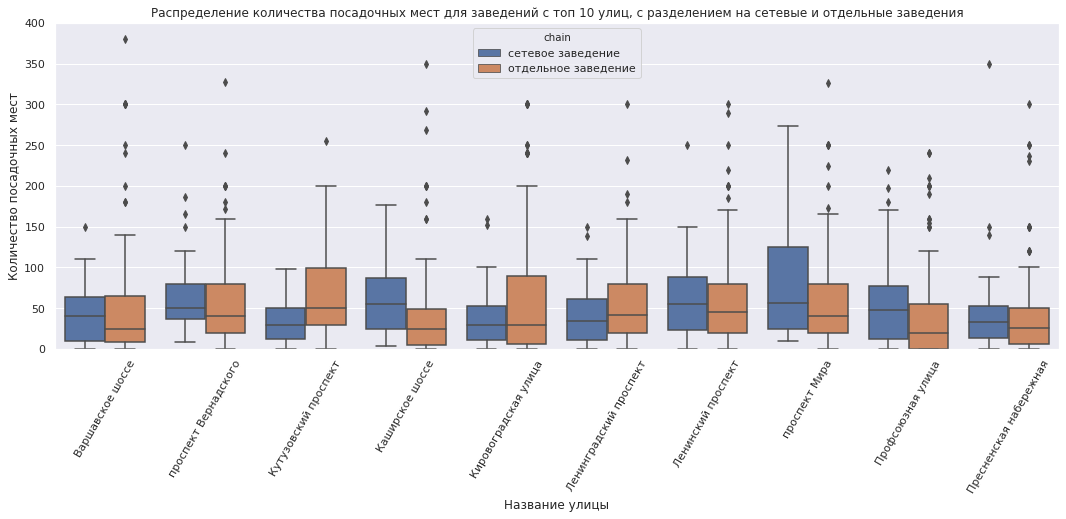

In [71]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(x="street", y="number", hue="chain", data=temp_df_top_10_street, orient='v' )
ax.set_ylim(0,400)
ax.set_title('Распределение количества посадочных мест для заведений с топ 10 улиц, с разделением на сетевые и отдельные заведения')
ax.set_xlabel('Название улицы')
ax.set_ylabel('Количество посадочных мест')
plt.xticks(rotation=60)
plt.show()

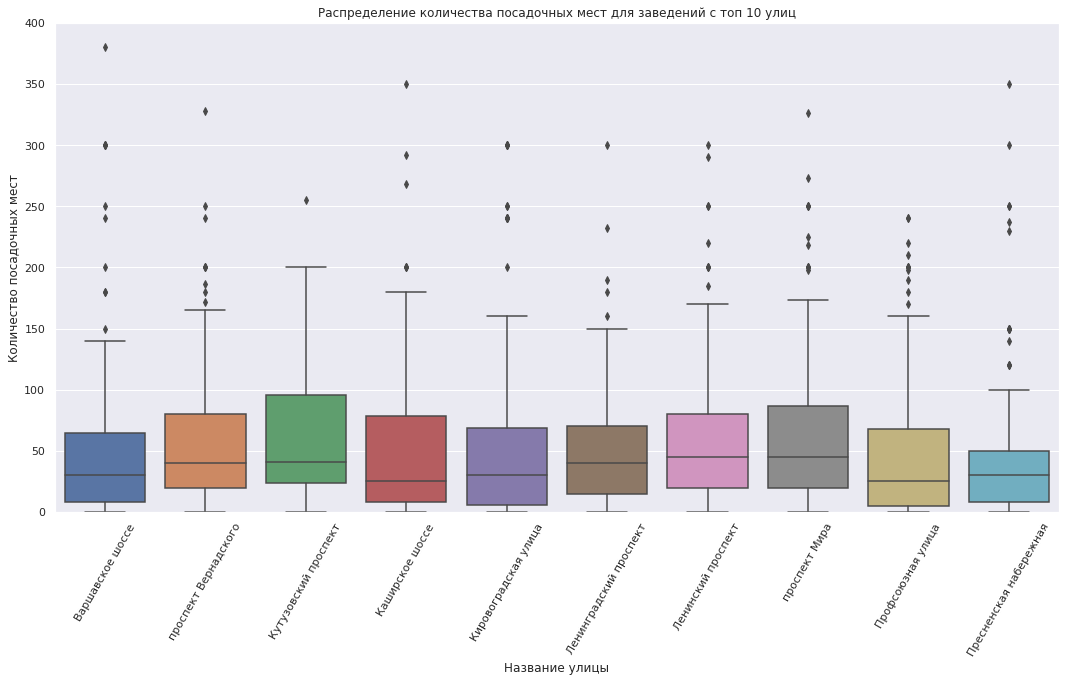

In [72]:
plt.figure(figsize=(18, 9))
ax = sns.boxplot(x="street", y="number", data=temp_df_top_10_street, orient='v' )
ax.set_ylim(0,400)
ax.set_title('Распределение количества посадочных мест для заведений с топ 10 улиц')
ax.set_xlabel('Название улицы')
ax.set_ylabel('Количество посадочных мест')
plt.xticks(rotation=60)
plt.show()

# Вывод
* Медианное количество мест для большинства заведений с топ-10 улиц меньше 50
* Чем больше заведений на улице, тем меньше количество мест.

---
---

<a id="question10"></a>
### 10. Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

# Общий вывод
1. По нашим данным, наибольшее количество заведений не относится к сетевым. Соотношение отдельных заведений и сетевых заведений в пропорции: 80/20
2. Сетевое распространение __характерно:__ для фастфуда (41,49% от всех заведений этого типа), отдела кулинарии (28,6%), кафе (23% от всех заведений этого типа) и ресторана (23,7%);
3. Сетевое распространение __не характерно:__ для столовой (0,12% от всех столовых), буфета (1,59%) и бара (4,36% от всех баров)
4. У сетевых заведений большинство объектов имеет меньше количество посадочных мест, чем у отдельных заведений. 
5. В сетевом фастфуде в среднем количество посадочных мест намного больше, чем в отдельных заведениях того же типа. 40,2 посадочных места в сетевом против 6,9 в отдельных заведениях
6. Самое большое количество посадочных мест предоставляет столовая и это тип заведения не характерен для сетей (только 3 наблюдения и среднее здесь не показательно), для отдельных заведения среднее количество мест в столовой ~ 130.

# Рекомендации
* Не совсем понимаю какие рекомендации мы можем дать, основываясь на наших данных, тк у нас нет финансовых показателей. Количество заведений на улице может не говорить о том, что эта улица успешна. Скорее это говорит о ее длине и расположении на ней больших торговых центров. Количество посадочных мест может исходить из стоимости аренды в конкретном районе.
* Однако, если опираться на вводные данные ("небольшое кафе с роботами-официантами"), то стандартное кафе должно иметь 37 посадочных места, находиться на проспект Мира в Северо-Восточном административном округе. Но все это как-то сомнительно. По-моему, если проект дорогой и уникальный, открывать его надо в ЦАО, с минимумом посадочных мест, чтобы очередь на вход начиналась от метро :)

<a id="presentation"></a>
# Презентация (pdf)
https://docs.google.com/presentation/d/16ktBQjr9BGOW026LZQlUvDpB-W4yP0J8vk_fRwX0DNQ/export/pdf

----------

## <span style="color:green">Финальный комментарий от наставника<span>

Как всегда потрясающая работа :)

### Комментарии по презентации:
* Круто, что все графики в одной цветовой схеме, в одном стиле.
* На слайдах много текста. Выводы и рекомендации лучше свести к коротким фразам. 
---------